In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,accuracy_score,classification_report





from sklearn.tree import DecisionTreeRegressor
#from sklearn.cross_validation import  cross_val_score

In [2]:
ecoli = pd.read_csv("ecoli.data",names = ['Sequence Number','mcg','gvh','lip','chg','aac','alm1','alm2','Class'],delim_whitespace=True)

In [3]:
ecoli.head(5)

,Sequence Number,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [4]:
ecoli['Sequence Number']

0       AAT_ECOLI
1      ACEA_ECOLI
2      ACEK_ECOLI
3      ACKA_ECOLI
4       ADI_ECOLI
          ...    
331    TREA_ECOLI
332    UGPB_ECOLI
333    USHA_ECOLI
334    XYLF_ECOLI
335    YTFQ_ECOLI
Name: Sequence Number, Length: 336, dtype: object

In [5]:
ecoli['Class'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: Class, dtype: int64

In [6]:
df_drpped=ecoli.drop(ecoli['alm2'].value_counts().loc[lambda x:x<20])

In [7]:
df_drpped.shape

(323, 9)

In [8]:
ecoli.shape

(336, 9)

In [9]:
def dropping_data(a):
    a = a.drop(['Sequence Number'],axis=1) 
    df = a[~a['Class'].isin(['omL','imS','imL'])]
    return df


df = dropping_data(ecoli)

In [10]:
df.shape

(327, 8)

In [11]:
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [12]:
## To check for null values

display(df.isnull().any())

mcg      False
gvh      False
lip      False
chg      False
aac      False
alm1     False
alm2     False
Class    False
dtype: bool

In [13]:
#df = df.drop(['Class'],axis=1)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


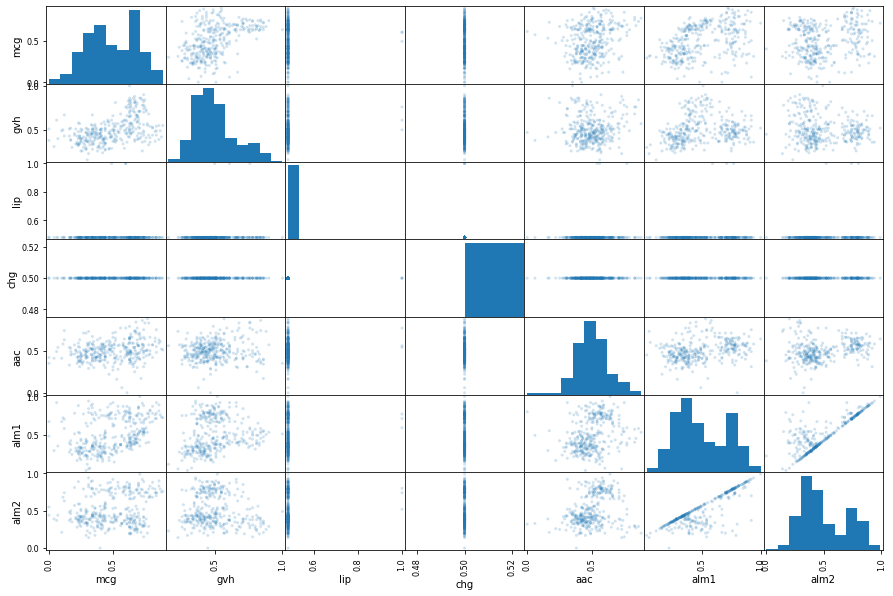

In [14]:
scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(15,10))

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Datas

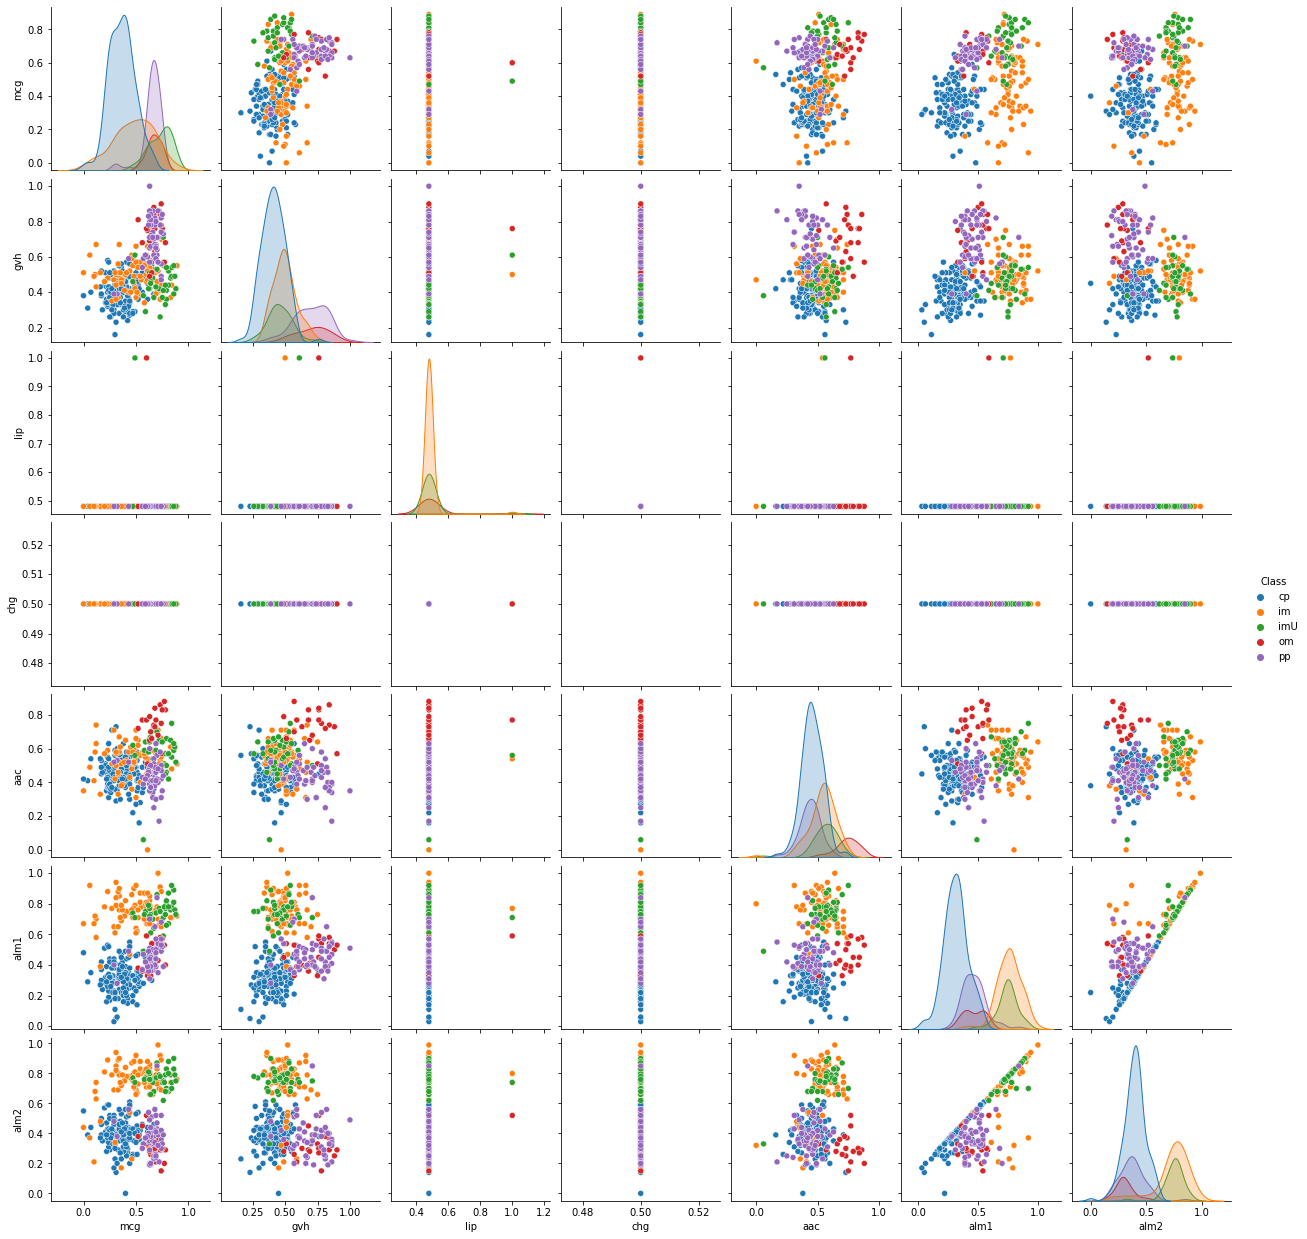

In [15]:
sns.pairplot(df,hue='Class')

In [16]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

print('Train Set Size and Columns: ',train_set.shape)
print('Test Set Size and Columns: ',test_set.shape)

Train Set Size and Columns:  (261, 8)
Test Set Size and Columns:  (66, 8)


In [17]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]



X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

In [18]:
list(X_train.columns)

['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']

In [19]:
[str(s) for s in y_train.unique()]

['im', 'cp', 'imU', 'om', 'pp']

## Without Scaling

In [20]:
tree_clf = DecisionTreeClassifier(max_depth=2)

tree_clf.fit(X_train, y_train)

#clf = DecisionTreeClassifier(random_state=1234)
#model = clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [21]:
text_representation = tree.export_text(tree_clf)
print(text_representation)


|--- feature_5 <= 0.57
|   |--- feature_1 <= 0.56
|   |   |--- class: cp
|   |--- feature_1 >  0.56
|   |   |--- class: pp
|--- feature_5 >  0.57
|   |--- feature_0 <= 0.75
|   |   |--- class: im
|   |--- feature_0 >  0.75
|   |   |--- class: imU



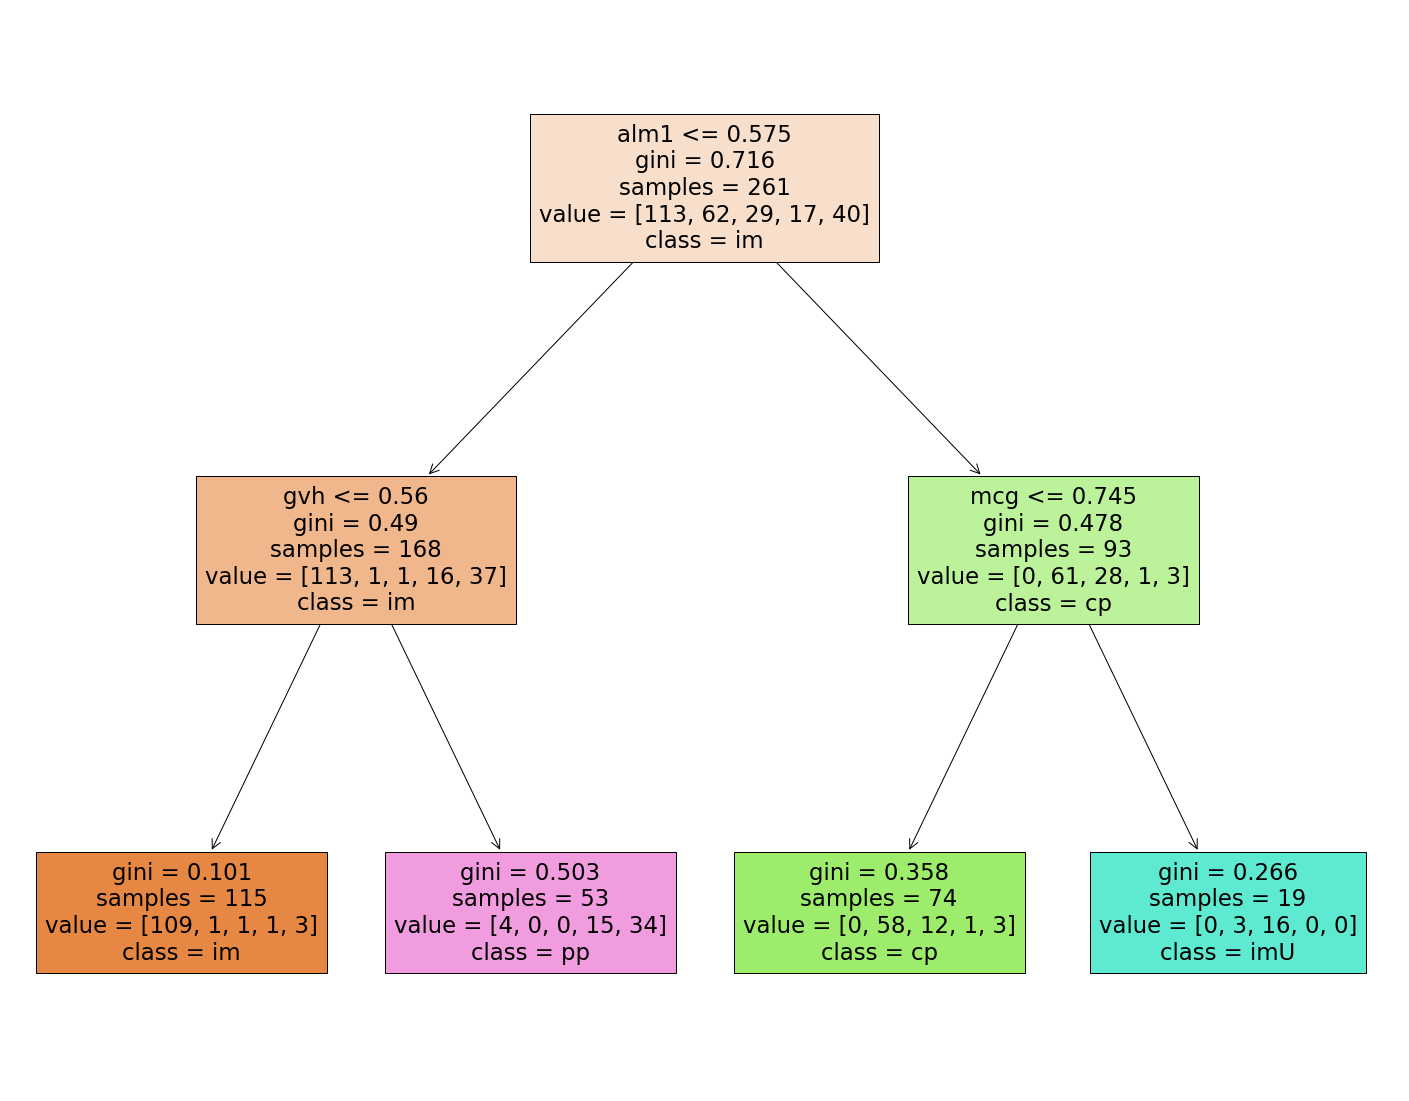

In [22]:
fig = plt.figure(figsize=(25,20))
q = tree.plot_tree(tree_clf, 
                   feature_names=list(X_train.columns),  
                   class_names=[str(s) for s in y_train.unique()],
                   filled=True)


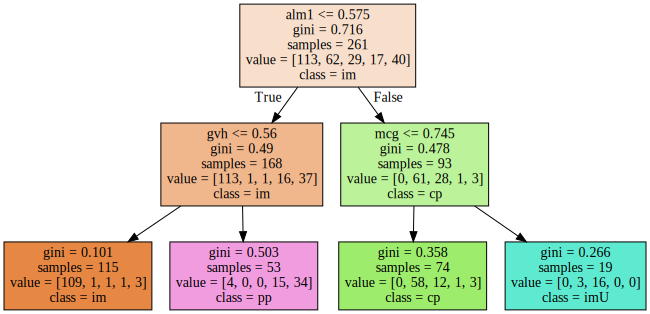

In [23]:
## USING GRAPHVIZ

dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=list(X_train.columns),  
                                class_names=[str(s) for s in y_train.unique()],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

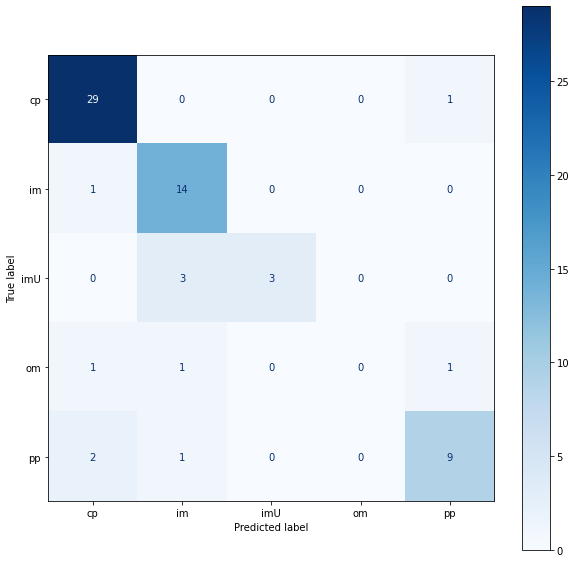

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
a = plot_confusion_matrix(tree_clf, X_test, y_test,cmap='Blues',ax=ax) 

In [25]:
print(classification_report(y_test, y_pred=tree_clf.predict(X_test), target_names=[str(s) for s in y_test.unique()]))

              precision    recall  f1-score   support

         imU       0.88      0.97      0.92        30
          cp       0.74      0.93      0.82        15
          pp       1.00      0.50      0.67         6
          im       0.00      0.00      0.00         3
          om       0.82      0.75      0.78        12

    accuracy                           0.83        66
   macro avg       0.69      0.63      0.64        66
weighted avg       0.81      0.83      0.81        66



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## With Scaling

<ipython-input-26-43a29eff08d0>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  training_scaled.hist(ax=ax)


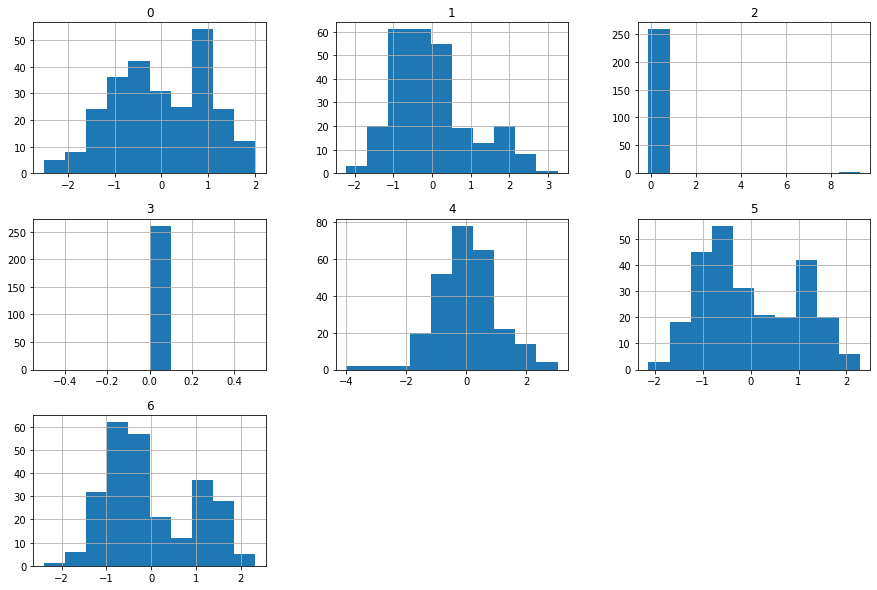

In [26]:
Scaler = preprocessing.StandardScaler()
training_scaled = Scaler.fit_transform(X_train)
training_scaled = pd.DataFrame(training_scaled)

fig,ax=plt.subplots(figsize=(15,10))
training_scaled.hist(ax=ax)
plt.show()

<ipython-input-27-ef73a0bf15ac>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  test_scaled.hist(ax=ax)


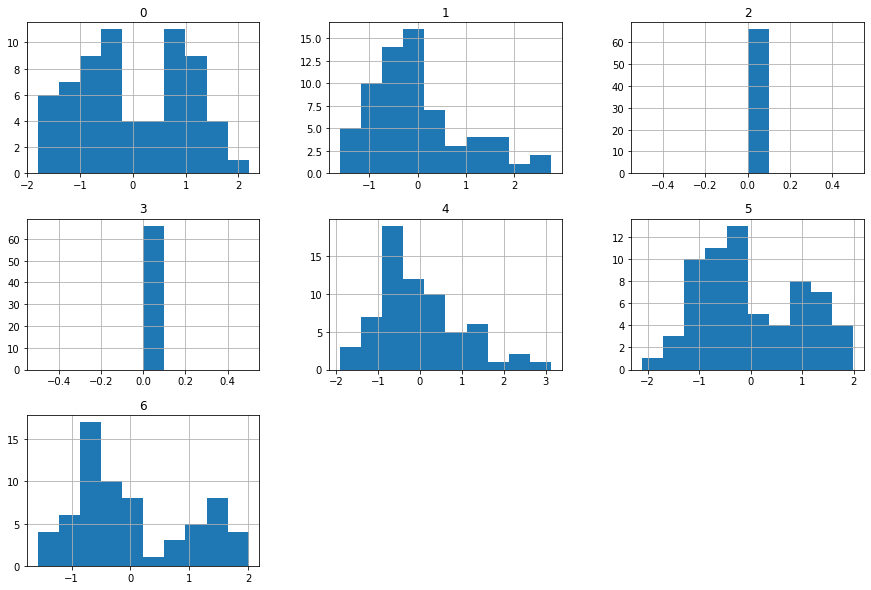

In [27]:
Scaler = preprocessing.StandardScaler()
test_scaled = Scaler.fit_transform(X_test)
test_scaled = pd.DataFrame(test_scaled)

fig,ax=plt.subplots(figsize=(15,10))
test_scaled.hist(ax=ax)
plt.show()

In [28]:
tree_params={'criterion':['entropy'],'max_depth':[4],'min_samples_leaf':[2],'max_features':["log2"]}
tree_clf_scaled = GridSearchCV(DecisionTreeClassifier(),tree_params,cv=3)

tree_clf_scaled.fit(training_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4],
                         'max_features': ['log2'], 'min_samples_leaf': [2]})

In [29]:
'''text_representation = tree.export_text(tree_clf)
print(text_representation)'''

'text_representation = tree.export_text(tree_clf)\nprint(text_representation)'

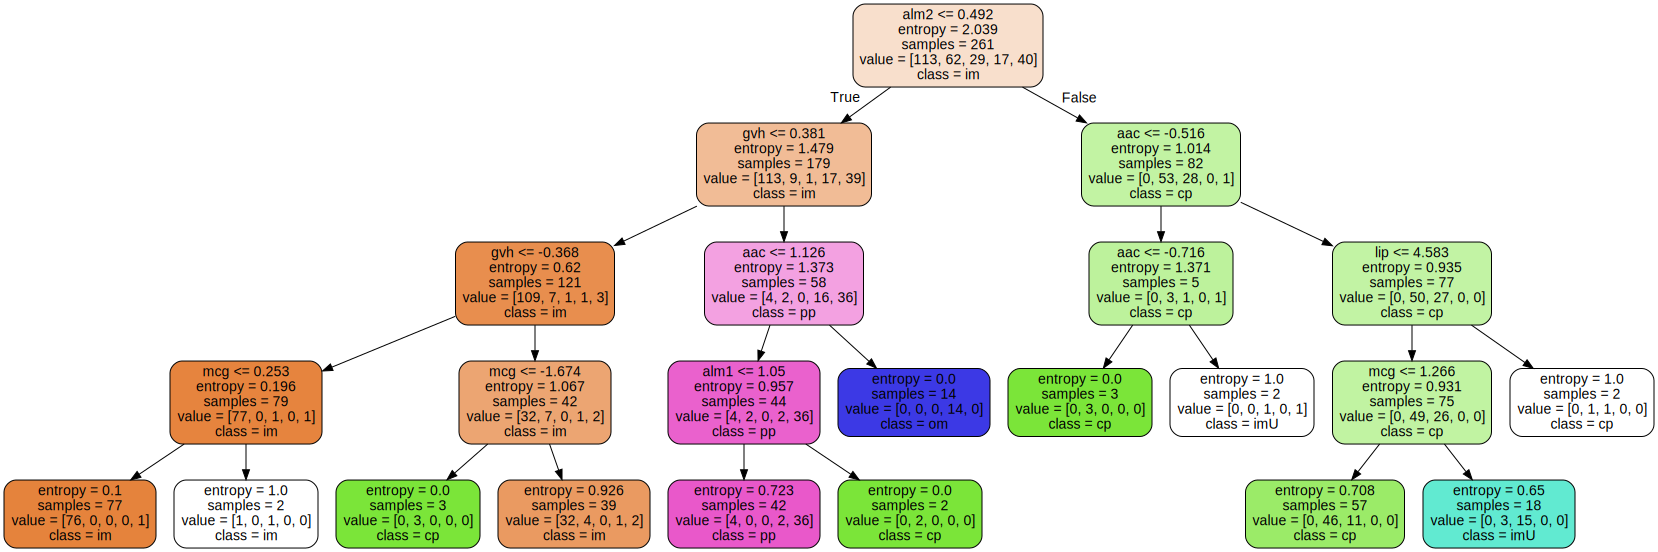

In [30]:
dot_data = export_graphviz(tree_clf_scaled.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=list(X_train.columns), class_names=[str(s) for s in y_train.unique()])

graph = graphviz.Source(dot_data, format="png") 
graph

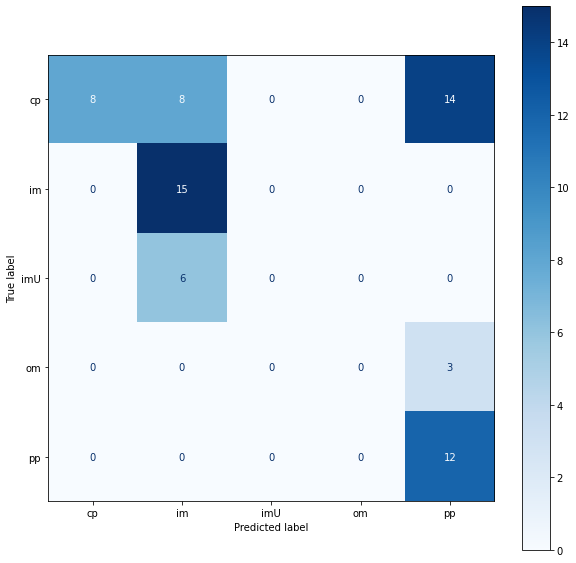

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
a = plot_confusion_matrix(tree_clf_scaled, X_test, y_test,cmap='Blues',ax=ax) 

In [32]:
print(classification_report(y_test, y_pred=tree_clf_scaled.predict(test_scaled), target_names=[str(s) for s in y_test.unique()]))

              precision    recall  f1-score   support

         imU       0.87      0.87      0.87        30
          cp       0.82      0.93      0.87        15
          pp       1.00      0.67      0.80         6
          im       0.67      0.67      0.67         3
          om       0.83      0.83      0.83        12

    accuracy                           0.85        66
   macro avg       0.84      0.79      0.81        66
weighted avg       0.85      0.85      0.85        66



# Part Two

In [33]:
slump = pd.read_csv("slump_test.data")

slump.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [34]:
slump.shape

(103, 11)

In [35]:
slump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

In [36]:
data = slump.iloc[:,1:-3]
data['Compressive Strength (28-day)(Mpa)'] = slump['Compressive Strength (28-day)(Mpa)']

In [37]:
data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [38]:
data['Compressive Strength (28-day)(Mpa)'].value_counts()

41.27    2
34.99    2
33.51    2
26.42    2
42.08    2
        ..
26.82    1
34.05    1
43.95    1
49.30    1
31.50    1
Name: Compressive Strength (28-day)(Mpa), Length: 83, dtype: int64

In [39]:
data.shape

(103, 8)

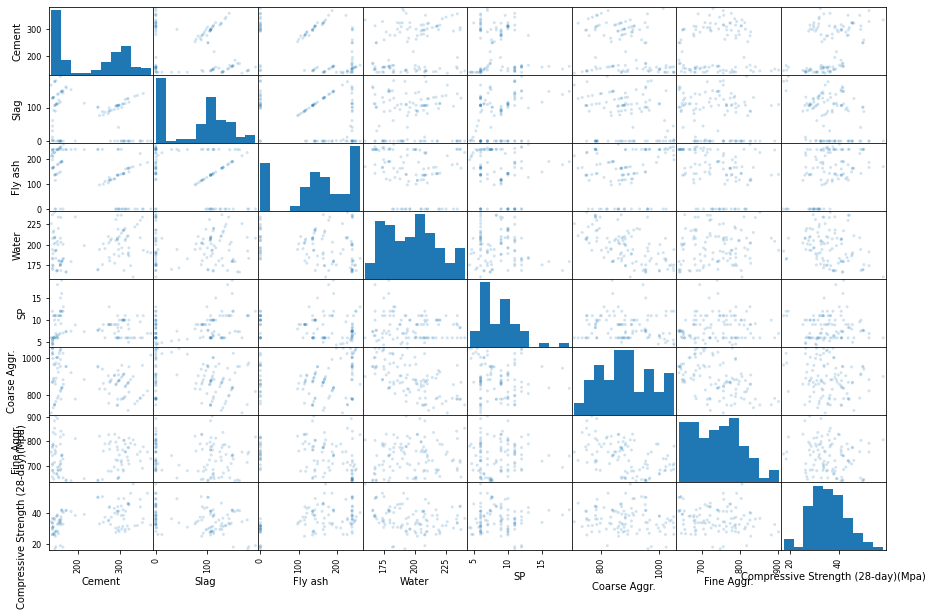

In [40]:
scatter_matrix = pd.plotting.scatter_matrix(data, alpha=0.2,figsize=(15,10))

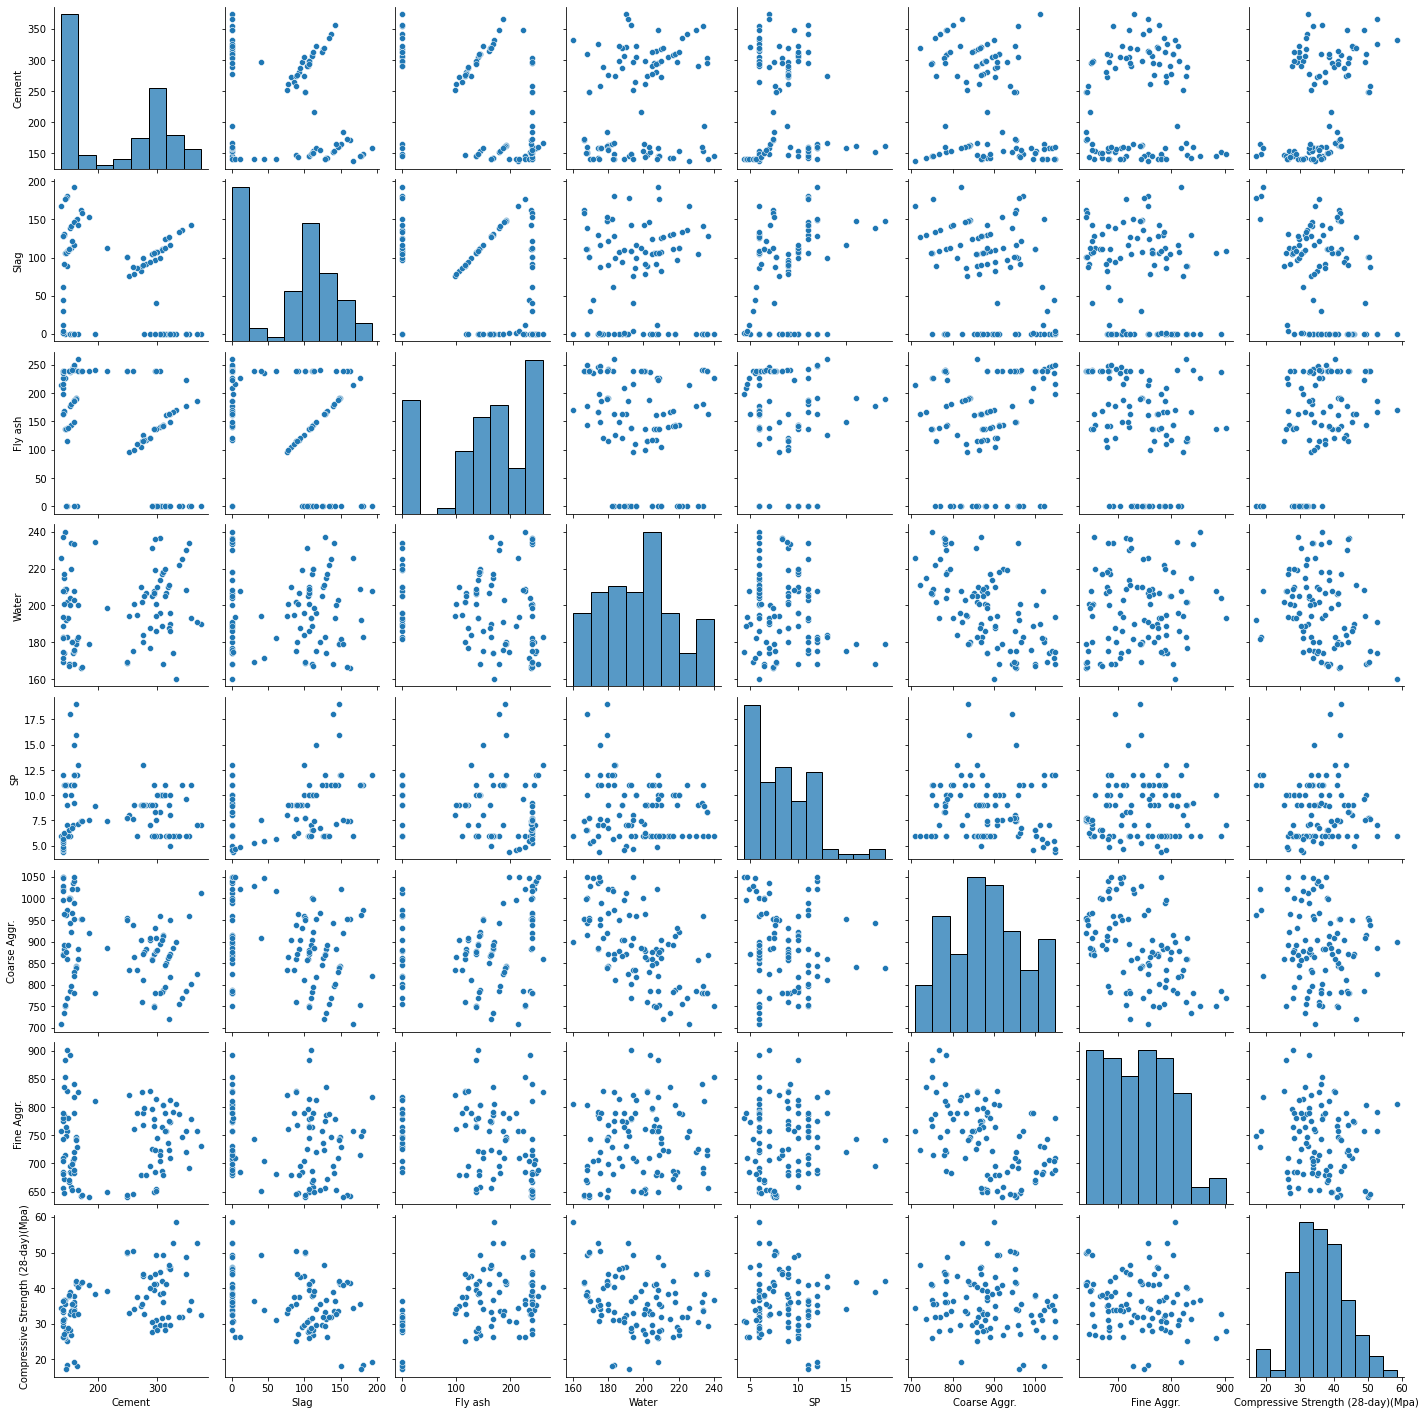

In [41]:
sns.pairplot(data)

## Without Scaling

In [42]:
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)

print('Train Set Size and Columns: ',train_set.shape)
print('Test Set Size and Columns: ',test_set.shape)

Train Set Size and Columns:  (82, 8)
Test Set Size and Columns:  (21, 8)


In [43]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]



X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

In [44]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [45]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


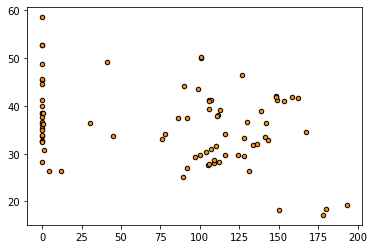

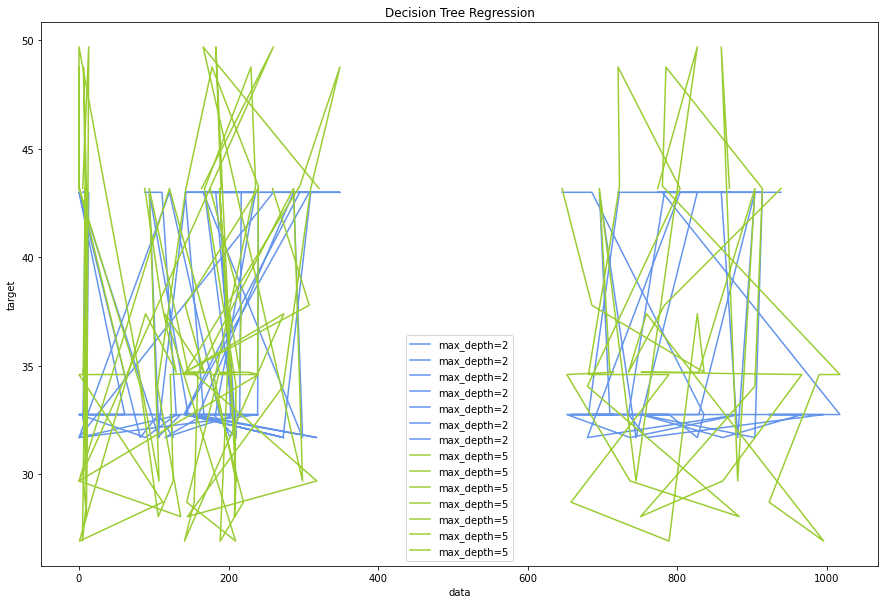

In [46]:
plt.figure()
plt.scatter(X_train['Slag'], y_train, s=20, edgecolor="black",c="darkorange", label="data")
fig,ax = plt.subplots(figsize=(15,10))

plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Remaining things to do 


 - Decision tree with scaling
 
 - SV Regressor with scaled input
 
 - Fine tune parameters given in labsheet
 
 - Show RMSE